# 2. Control Application

In [1]:
import numpy as np
import scipy.signal as signal
import control as ctrl  # pip install control
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Complex Numbers

In [3]:
# Two ways of defining complex number in Python
z1 = 3 + 4j
z2 = complex(1, -2)

# Operations
z_sum = z1 + z2
z_product = z1 * z2
z_conjugate = z1.conjugate()

print("Sum:", z_sum)
print("Product:", z_product)
print("Conjugate:", z_conjugate)

Sum: (4+2j)
Product: (11-2j)
Conjugate: (3-4j)


## Polynomials

In [4]:
# Define a polynomial P(s) = s^2 + 5s + 6
coefficients = [1, 5, 6]

# Roots of the polynomial
roots = np.roots(coefficients)
print("Roots of the polynomial:", roots)

Roots of the polynomial: [-3. -2.]


## Transfer Functions

In [5]:
# Define the transfer function: H(s) = 1 / (s^2 + 5s + 6)
num = [1]  # Numerator coefficients
den = [1, 5, 6]  # Denominator coefficients

# Create the transfer function
system = signal.TransferFunction(num, den)

# Display the transfer function
print("Transfer function:", system)

# Analyze poles and zeros
poles, zeros, gain = signal.tf2zpk(num, den)
print("Poles:", poles)
print("Zeros:", zeros)

Transfer function: TransferFunctionContinuous(
array([1.]),
array([1., 5., 6.]),
dt: None
)
Poles: []
Zeros: [-3. -2.]


### Example: Transfer Functions Multiplication

In [6]:
num1 = [1]
den1 = [1, 5, 6]
num2 = [2]
den2 = [1, 3]

# Multiply two transfer functions
system1 = signal.TransferFunction(num1, den1)
system2 = signal.TransferFunction(num2, den2)
system_product = signal.TransferFunction(np.polymul(num1, num2), np.polymul(den1, den2))

print("Product of transfer functions:", system_product)

Product of transfer functions: TransferFunctionContinuous(
array([2.]),
array([ 1.,  8., 21., 18.]),
dt: None
)


## System Responses

### Example: Step Response

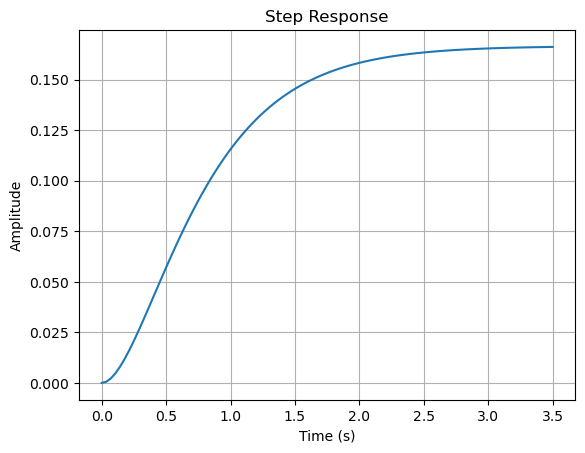

In [7]:
# Define the transfer function
num = [1]  # Numerator coefficients
den = [1, 5, 6]  # Denominator coefficients
system = signal.TransferFunction(num, den)
# Simulate the step response
time, response = signal.step(system)

# Plot the step response
plt.plot(time, response)
plt.title('Step Response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

### Example: Impulse Response

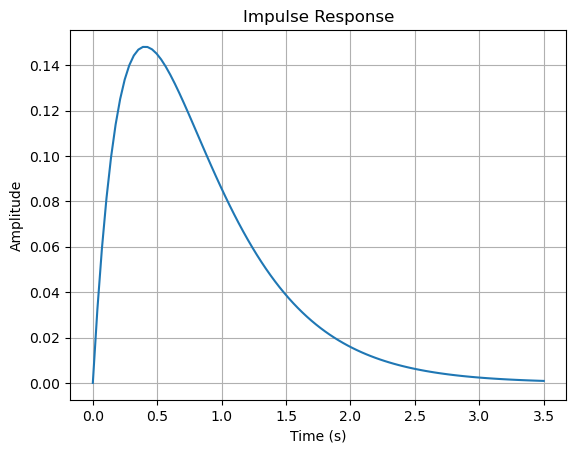

In [8]:
# Define the transfer function
num = [1]  # Numerator coefficients
den = [1, 5, 6]  # Denominator coefficients
system = signal.TransferFunction(num, den)
# Simulate the impulse response
time, response = signal.impulse(system)

# Plot the impulse response
plt.plot(time, response)
plt.title('Impulse Response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

## PID Controller

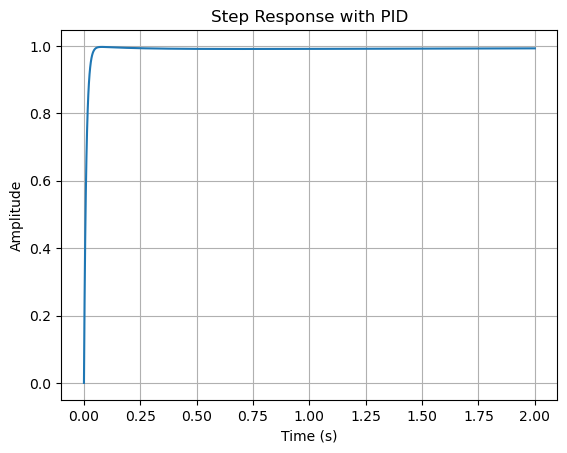

In [9]:
# Define the transfer function of a simple system G(s) = 1 / (s^2 + 5s + 6)
num = [1]
den = [1, 5, 6]
system = ctrl.TransferFunction(num, den)

# Define a PID controller with Kp, Ki, and Kd values
Kp = 500
Ki = 100
Kd = 100
pid_controller = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])

# Closed-loop system
closed_loop = ctrl.feedback(pid_controller * system)

# Simulate step response
time, response = ctrl.step_response(closed_loop, T=2)

# Plot the response
plt.plot(time, response)
plt.title('Step Response with PID')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()